## Sentiment Analysis

Sentiment analysis is a powerful tool that allows computers to understand the underlying subjective tone of a piece of writing. This is something that humans have difficulty with, and as you might imagine, it isn’t always so easy for computers, either. But with the right tools and Python, you can use sentiment analysis to better understand the sentiment of a piece of writing.

In this tutorial, you’ll learn:

    How to use natural language processing (NLP) techniques
    How to use machine learning to determine the sentiment of text
    How to use spaCy to build an NLP pipeline that feeds into a sentiment analysis classifier


## Importing the necessary packages

In [1]:
!pip install num2words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 KB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=dcf8cbccf75d501cb9dd44e7177f7916f88a92f5b703a45140783f54f9df2de9
  Stored in directory: /root/.cache/pip/wheels/56/ea/58/ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built docopt


In [2]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
from num2words import num2words
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
nltk.download('punkt')
nltk.download('stopwords')


warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Reading the csv file

In [3]:
!gdown --id 1TQ05A0Sjk16plMJFllvd8nU-_68pvPPD

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1TQ05A0Sjk16plMJFllvd8nU-_68pvPPD
To: /content/Sentiment.csv
100% 687k/687k [00:00<00:00, 40.8MB/s]


In [4]:
import pandas as pd
df = pd.read_csv('Sentiment.csv')
df.head()

,Sentence,Sentiment,num_sent
0,"According to Gran , the company has no plans t...",neutral,0
1,Technopolis plans to develop in stages an area...,neutral,0
2,The international electronic industry company ...,negative,-1
3,With the new production plant the company woul...,positive,1
4,According to the company 's updated strategy f...,positive,1


Let's now see the distribution of sentiments across all the sentences. Execute the following script:

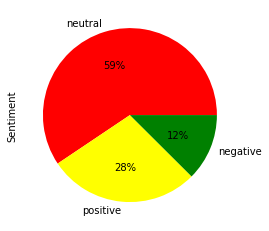

In [5]:
df.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

From the output, you can see that the majority of the sentences are neutral (59%), followed by positive sentences (28%), and then the negative sentences (12%).

## Using Natural Language Processing to Preprocess and Clean Text Data

Any sentiment analysis workflow begins with loading data. But what do you do once the data’s been loaded? You need to process it through a natural language processing pipeline before you can do anything interesting with it.

The necessary steps include (but aren’t limited to) the following:

    Tokenizing sentences to break text down into sentences, words, or other units
    Removing stop words like “if,” “but,” “or,” and so on
    Normalizing words by condensing all forms of a word into a single form
    Vectorizing text by turning the text into a numerical representation for consumption by your classifier

All these steps serve to reduce the noise inherent in any human-readable text and improve the accuracy of your classifier’s results. There are lots of great tools to help with this, such as the Natural Language Toolkit, TextBlob, and spaCy. For this tutorial, you’ll use spaCy.

In [6]:
def remove_punctuation(data):
    data = np.char.replace(data, "-", ' ')
    data = np.char.replace(data, "/", ' ')
    data = np.char.replace(data, "'s", '')
    data = np.char.replace(data, "'S", '')
    symbols = "!\"#$%&()*+<=>@[\]^_`{|}~”.,:;"
    for i in range(len(symbols)):
        data = np.char.replace(data, symbols[i], '')
    return str(data)

In [7]:
def remove_stop_words(data):
    stop_words = stopwords.words('english')
    words = word_tokenize(str(data))
    new_text = ""
    for w in words:
        if w not in stop_words and len(w) > 1:
            new_text = new_text + " " + w
    return new_text

In [8]:
def convert_numbers(data):
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        try:
            w = num2words(int(w))
        except:
            a = 0
        new_text = new_text + " " + w
    new_text = np.char.replace(new_text, "-", " ")
    return str(new_text)

In [9]:
def convert_lower_case(data):
    return str(np.char.lower(data))

In [10]:
def stemming(data):
    stemmer= PorterStemmer()
    
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        new_text = new_text + " " + stemmer.stem(w)
    return new_text

## Removing Punctuation, Numbers, and Special Characters

In [11]:
clean_sentences = [ convert_lower_case(convert_numbers(remove_punctuation(sent))) for sent in list(df['Sentence'])]

In [12]:
df['clean_sent'] = clean_sentences

In [13]:
df.head(10)

,Sentence,Sentiment,num_sent,clean_sent
0,"According to Gran , the company has no plans t...",neutral,0,according to gran the company has no plans to...
1,Technopolis plans to develop in stages an area...,neutral,0,technopolis plans to develop in stages an are...
2,The international electronic industry company ...,negative,-1,the international electronic industry company...
3,With the new production plant the company woul...,positive,1,with the new production plant the company wou...
4,According to the company 's updated strategy f...,positive,1,according to the company updated strategy for...
5,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,positive,1,financing of aspocomp growth aspocomp is aggr...
6,"For the last quarter of 2010 , Componenta 's n...",positive,1,for the last quarter of two thousand and ten ...
7,"In the third quarter of 2010 , net sales incre...",positive,1,in the third quarter of two thousand and ten ...
8,Operating profit rose to EUR 13.1 mn from EUR ...,positive,1,operating profit rose to eur one hundred and ...
9,"Operating profit totalled EUR 21.1 mn , up fro...",positive,1,operating profit totalled eur two hundred and...


In [14]:
stem_sentences = [ remove_stop_words(stemming(sent)) for sent in list(df['clean_sent'])]

In [15]:
df['stem_sent'] = stem_sentences

In [16]:
df.head(10)

,Sentence,Sentiment,num_sent,clean_sent,stem_sent
0,"According to Gran , the company has no plans t...",neutral,0,according to gran the company has no plans to...,accord gran compani ha plan move product russ...
1,Technopolis plans to develop in stages an area...,neutral,0,technopolis plans to develop in stages an are...,technopoli plan develop stage area less one h...
2,The international electronic industry company ...,negative,-1,the international electronic industry company...,intern electron industri compani elcoteq ha l...
3,With the new production plant the company woul...,positive,1,with the new production plant the company wou...,new product plant compani would increas capac...
4,According to the company 's updated strategy f...,positive,1,according to the company updated strategy for...,accord compani updat strategi year two thousa...
5,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,positive,1,financing of aspocomp growth aspocomp is aggr...,financ aspocomp growth aspocomp aggress pursu...
6,"For the last quarter of 2010 , Componenta 's n...",positive,1,for the last quarter of two thousand and ten ...,last quarter two thousand ten componenta net ...
7,"In the third quarter of 2010 , net sales incre...",positive,1,in the third quarter of two thousand and ten ...,third quarter two thousand ten net sale incre...
8,Operating profit rose to EUR 13.1 mn from EUR ...,positive,1,operating profit rose to eur one hundred and ...,oper profit rose eur one hundr thirti one mn ...
9,"Operating profit totalled EUR 21.1 mn , up fro...",positive,1,operating profit totalled eur two hundred and...,oper profit total eur two hundr eleven mn eur...


In [17]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [18]:
all_words_positive = ' '.join(text for text in df['stem_sent'][df['num_sent']==1])

In [19]:
my_list = list(all_words_positive.split(" "))

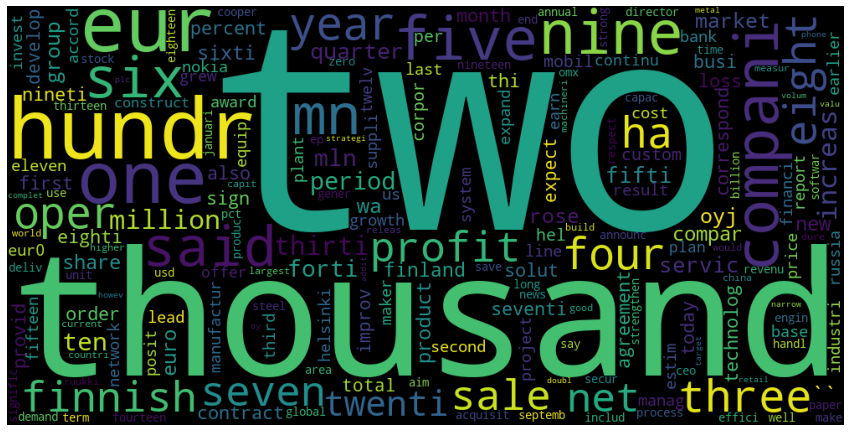

In [20]:
#convert it to dictionary with values and its occurences
from collections import Counter
word_could_dict=Counter(my_list)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
#plt.savefig('yourfile.png', bbox_inches='tight')
plt.close()

## Representing Text in Numeric Form

In [21]:
all_sentences = '.'.join(list(df['stem_sent']))

## TF-IDF

In [22]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8)
processed_features = vectorizer.fit_transform(list(df['stem_sent']))

## Dividing Data into Training and Test Sets

In the previous section, we converted the data into the numeric form. As the last step before we train our algorithms, we need to divide our data into training and testing sets. The training set will be used to train the algorithm while the test set will be used to evaluate the performance of the machine learning model.

Execute the following code:

In [23]:
labels = df.iloc[:, 2].values

In [24]:

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

## Training the Model

Once data is split into training and test set, machine learning algorithms can be used to learn from the training data. You can use any machine learning algorithm. However, we will use the Random Forest algorithm, owing to its ability to act upon non-normalized data.

In [25]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [26]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=0.5)
lr.fit(X_train, y_train)
predictions_lr = lr.predict(X_test)

## Making Predictions and Evaluating the Model

Once the model has been trained, the last step is to make predictions on the model. To do so, we need to call the predict method on the object of the RandomForestClassifier class that we used for training. Look at the following script:

In [27]:
predictions_rf = text_classifier.predict(X_test)

Finally, to evaluate the performance of the machine learning models, we can use classification metrics such as a confusion metrix, F1 measure, accuracy, etc.

To find the values for these metrics, we can use classification_report, confusion_matrix, and accuracy_score utilities from the sklearn.metrics library. Look a the following script:

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions_rf))
print(classification_report(y_test,predictions_rf))
print(accuracy_score(y_test, predictions_rf))

[[ 42  66  20]
 [  3 545  27]
 [  9 133 125]]
              precision    recall  f1-score   support

          -1       0.78      0.33      0.46       128
           0       0.73      0.95      0.83       575
           1       0.73      0.47      0.57       267

    accuracy                           0.73       970
   macro avg       0.75      0.58      0.62       970
weighted avg       0.74      0.73      0.71       970

0.734020618556701


In [29]:
print(confusion_matrix(y_test,predictions_lr))
print(classification_report(y_test,predictions_lr))
print(accuracy_score(y_test, predictions_lr))

[[ 38  66  24]
 [  3 553  19]
 [  9 134 124]]
              precision    recall  f1-score   support

          -1       0.76      0.30      0.43       128
           0       0.73      0.96      0.83       575
           1       0.74      0.46      0.57       267

    accuracy                           0.74       970
   macro avg       0.75      0.57      0.61       970
weighted avg       0.74      0.74      0.71       970

0.7371134020618557


In [30]:
train_data = list(zip(df.stem_sent,df.num_sent))

In [31]:
from sklearn.feature_extraction.text import CountVectorizer


ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))
ngram_vectorizer.fit(list(df['stem_sent']))
X = ngram_vectorizer.transform(list(df['stem_sent']))

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=0)

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))
    

Accuracy for C=0.01: 0.6979381443298969
Accuracy for C=0.05: 0.7422680412371134
Accuracy for C=0.25: 0.7680412371134021
Accuracy for C=0.5: 0.7628865979381443
Accuracy for C=1: 0.7628865979381443


In [33]:
lr = LogisticRegression(C=0.5)
lr.fit(X_train, y_train)

LogisticRegression(C=0.5)

In [34]:
predictions_lr = lr.predict(X_test)

In [35]:
print(confusion_matrix(y_test,predictions_lr))
print(classification_report(y_test,predictions_lr))
print(accuracy_score(y_test, predictions_lr))

[[ 59  52  17]
 [  8 536  31]
 [  8 114 145]]
              precision    recall  f1-score   support

          -1       0.79      0.46      0.58       128
           0       0.76      0.93      0.84       575
           1       0.75      0.54      0.63       267

    accuracy                           0.76       970
   macro avg       0.77      0.65      0.68       970
weighted avg       0.76      0.76      0.75       970

0.7628865979381443


In [36]:
wc_vectorizer = CountVectorizer(binary=False)
wc_vectorizer.fit(list(df['stem_sent']))
X = wc_vectorizer.transform(list(df['stem_sent']))

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=0)

lr = LogisticRegression(C=0.5)
lr.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.5)

In [38]:
predictions_lr = lr.predict(X_test)

In [39]:
print(confusion_matrix(y_test,predictions_lr))
print(classification_report(y_test,predictions_lr))
print(accuracy_score(y_test, predictions_lr))

[[ 61  47  20]
 [ 11 521  43]
 [ 15 105 147]]
              precision    recall  f1-score   support

          -1       0.70      0.48      0.57       128
           0       0.77      0.91      0.83       575
           1       0.70      0.55      0.62       267

    accuracy                           0.75       970
   macro avg       0.73      0.64      0.67       970
weighted avg       0.74      0.75      0.74       970

0.7515463917525773


In [40]:
from sklearn.svm import LinearSVC
svm = LinearSVC(C=0.5)
svm.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=0.5)

In [41]:
predictions_svm = svm.predict(X_test)

In [42]:
print(confusion_matrix(y_test,predictions_svm))
print(classification_report(y_test,predictions_svm))
print(accuracy_score(y_test, predictions_svm))

[[ 75  38  15]
 [ 19 492  64]
 [ 16 101 150]]
              precision    recall  f1-score   support

          -1       0.68      0.59      0.63       128
           0       0.78      0.86      0.82       575
           1       0.66      0.56      0.60       267

    accuracy                           0.74       970
   macro avg       0.71      0.67      0.68       970
weighted avg       0.73      0.74      0.73       970

0.7391752577319588


## LSTM

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical


max_vocab = 10000
max_len = 500
messages = list(df['stem_sent'])
labels = to_categorical(df['num_sent'], num_classes=3)

# Ignore all words except the 10000 most common words
tokenizer = Tokenizer(num_words=max_vocab)
# Calculate the frequency of words
tokenizer.fit_on_texts(messages)
# Convert array of messages to list of sequences of integers
sequences = tokenizer.texts_to_sequences(messages)

In [ ]:
# Dict keeping track of words to integer index
word_index = tokenizer.word_index

In [ ]:
from keras.preprocessing.sequence import pad_sequences

# Convert the array of sequences(of integers) to 2D array with padding
# maxlen specifies the maximum length of sequence (truncated if longer, padded if shorter)
data = pad_sequences(sequences, maxlen=max_len)

In [ ]:
print("data shape: ", data.shape)

data shape:  (4846, 500)


In [ ]:
# We will use 80% of data for training & validation(80% train, 20% validation) and 20% for testing
# train_samples = int(len(messages)*0.8)

# messages_train = data[:train_samples]
# labels_train = labels[:train_samples]

# messages_test = data[train_samples:len(messages)-2]
# labels_test = labels[train_samples:len(messages)-2]

messages_train, messages_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [ ]:
embedding_mat_columns=32

In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, GRU, Embedding, Dense, Flatten

# Construct the SimpleRNN model
model = Sequential()
## Add embedding layer to convert integer encoding to word embeddings(the model learns the
## embedding matrix during training), embedding matrix has max_vocab as no. of rows and chosen
## no. of columns
model.add(Embedding(input_dim=max_vocab, output_dim=embedding_mat_columns, input_length=max_len))
#model.add(SimpleRNN(units=embedding_mat_columns))
#model.add(GRU(units=embedding_mat_columns))
model.add(LSTM(units=embedding_mat_columns))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 99        
Total params: 328,419
Trainable params: 328,419
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training the model
history = model.fit(messages_train, labels_train, epochs=12, batch_size=20, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, min_delta=0.0001)])

Instructions for updating:
Use tf.cast instead.
Train on 3100 samples, validate on 776 samples
Epoch 1/12
3100/3100 [==============================] - 54s - loss: 0.8872 - acc: 0.6052 - val_loss: 0.8657 - val_acc: 0.6147
Epoch 2/12
3100/3100 [==============================] - 68s - loss: 0.6767 - acc: 0.6881 - val_loss: 0.7900 - val_acc: 0.6572
Epoch 3/12
3100/3100 [==============================] - 72s - loss: 0.4745 - acc: 0.8023 - val_loss: 0.8211 - val_acc: 0.6611
Epoch 4/12
3100/3100 [==============================] - 75s - loss: 0.2859 - acc: 0.9026 - val_loss: 0.8521 - val_acc: 0.6843
Epoch 5/12
3100/3100 [==============================] - 69s - loss: 0.1758 - acc: 0.9445 - val_loss: 1.0113 - val_acc: 0.6830
Epoch 6/12
3100/3100 [==============================] - 67s - loss: 0.1321 - acc: 0.9603 - val_loss: 1.0777 - val_acc: 0.6997
Epoch 7/12
3100/3100 [==============================] - 73s - loss: 0.0920 - acc: 0.9706 - val_loss: 1.1168 - val_acc: 0.7023
Epoch 8/12
3100/3100 [=

In [ ]:

# Testing the model
pred = model.predict_classes(messages_test)

accr = model.evaluate(messages_test, labels_test)
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(accr[0],accr[1]))

970/970 [==============================] - 1s     
Test loss is 1.07 accuracy is 0.74  


In [ ]:
lab_test = [np.argmax(labels, axis=0) for labels in labels_test]

In [ ]:
print(confusion_matrix(lab_test,pred))
print(classification_report(lab_test,pred))
print(accuracy_score(lab_test, pred))

[[488  75  12]
 [ 91 161  15]
 [ 37  19  72]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       575
           1       0.63      0.60      0.62       267
           2       0.73      0.56      0.63       128

    accuracy                           0.74       970
   macro avg       0.72      0.67      0.69       970
weighted avg       0.74      0.74      0.74       970

0.743298969072165


## Refrences

https://realpython.com/sentiment-analysis-python/

https://stackabuse.com/python-for-nlp-sentiment-analysis-with-scikit-learn/